# Ford GoBike System Data Exploration

## by Elaine Lau



## Preliminary Wrangling

> This document explores a dataset about rides taken using a bike-sharing system in the greater San Francisco Bay area in 2019. Since the information is stored by month in separate files, the data will need to be combined to enable analysis over a whole year.

In [2]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [37]:
# load in ride info for months 1 - 4 into dictionary of dataframes with fordgobike-tripdata.csv filenames
rides_dict = {}
for x in range(1,5):
    filename = str(20190) + str(x) + '-fordgobike-tripdata.csv'
    keyname = 'rides_0' + str(x)
    rides_dict[keyname] = pd.read_csv(filename)
    print(keyname, filename)

rides_01 201901-fordgobike-tripdata.csv
rides_02 201902-fordgobike-tripdata.csv
rides_03 201903-fordgobike-tripdata.csv
rides_04 201904-fordgobike-tripdata.csv


In [38]:
# load in ride info for months 5 to 12 with baywheels-tripdata.csv filenames
# Specify data types for columns user_type and bike_share and set low-memory to False because of warning message
for x in range(5,13):
    if x < 10:
        month = str(0) + str(x)
    else:
        month = str(x)
    filename = str(2019)+ month + '-baywheels-tripdata.csv'
    keyname = 'rides_'+ month
    rides_dict[keyname] = pd.read_csv(filename,dtype={'user_type':str, 'bike_share_for_all':str},low_memory=False)
    print(keyname, filename)

rides_05 201905-baywheels-tripdata.csv
rides_06 201906-baywheels-tripdata.csv
rides_07 201907-baywheels-tripdata.csv
rides_08 201908-baywheels-tripdata.csv
rides_09 201909-baywheels-tripdata.csv
rides_10 201910-baywheels-tripdata.csv
rides_11 201911-baywheels-tripdata.csv
rides_12 201912-baywheels-tripdata.csv


In [39]:
# Check basic shape and data types of dataframes
for keyname, df in rides_dict.items():
    print(keyname, df.shape)
    print(df.dtypes)
    print()


rides_01 (192082, 14)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object

rides_02 (183412, 14)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   obj

In [40]:
# Drop extra column of rental_access_method for months 6, 7, 11, and 12
extra_months = ['rides_06', 'rides_07', 'rides_11', 'rides_12']
for m in extra_months:
    rides_dict[m].drop('rental_access_method', axis = 1, inplace = True)
    print(m, rides_dict[m].shape)

rides_06 (191772, 14)
rides_07 (258102, 14)
rides_11 (185496, 14)
rides_12 (150102, 13)


In [41]:
# Drop bike_share_for_all_trip column from months 1 thru 11 since month 12 is missing it
for m in range(1,12):
    if m < 10:
        month = str(0) + str(m)
    else:
        month = str(m)
    keyname = 'rides_'+ month
    rides_dict[keyname].drop('bike_share_for_all_trip', axis = 1, inplace = True)
    print(keyname, rides_dict[keyname].shape)

rides_01 (192082, 13)
rides_02 (183412, 13)
rides_03 (256299, 13)
rides_04 (239111, 13)
rides_05 (182163, 13)
rides_06 (191772, 13)
rides_07 (258102, 13)
rides_08 (210563, 13)
rides_09 (217986, 13)
rides_10 (239895, 13)
rides_11 (185496, 13)


In [44]:
# Build a list of dataframes and concat together dataframes
rides_list = []
total = 0
for keyname, df in rides_dict.items():
    total += df.shape[0]
    rides_list.append(df)
print('Total: ', total)
rides_2019 = pd.concat(rides_list, ignore_index=True)
rides_2019.shape

Total:  2506983


(2506983, 13)

In [45]:
# Check structure of dataframe
rides_2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer


In [46]:
# Saved copy of ride data for all of 2019 into csv
rides_2019.to_csv('rides_2019.csv', index = False)

In [3]:
# Retrieve ride data for 2019
rides_2019 = pd.read_csv('rides_2019.csv')
rides_2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer


In [5]:
# Check data
rides_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 248.6+ MB


In [6]:
rides_2019.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [4]:
# Make a copy before altering
rides = rides_2019.copy()

>Data Wrangling issues:
- Change start_time and end_time to datetime
- Change user_type to category type
- Add columns for time of day (hour), day of the week (weekday), and month of year (month)

In [7]:
# Change start_time and end_time to datetime
rides['start_time'] = pd.to_datetime(rides['start_time'])
rides['end_time'] = pd.to_datetime(rides['end_time'])

In [8]:
# Change user_type to category type
rides['user_type'] = rides['user_type'].astype('category')

In [9]:
# Check data types
rides.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
dtype: object

In [12]:
# Add columns for time of day (hour), day of the week (weekday), and month of year (month)
rides['hour'] = rides['start_time'].dt.hour
rides['weekday'] = rides['start_time'].dt.dayofweek
rides['month'] = rides['start_time'].dt.month
rides.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,hour,weekday,month
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,17,3,1
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,20,3,1
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,18,3,1
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,19,3,1
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,14,3,1


In [16]:
rides.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,hour,weekday,month
2506978,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,18,5,12
2506979,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,18,5,12
2506980,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,14,3,12
2506981,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,20,0,12
2506982,4023,2019-12-31 19:26:48,2019-12-31 20:33:52,NaN,NaN,37.811042,-122.418149,NaN,NaN,37.810970,-122.418054,662304,Subscriber,19,1,12


In [17]:
# Saved altered ride data for all of 2019 into csv
rides.to_csv('rides.csv', index = False)

In [3]:
# Load rides data back into dataframe
rides = pd.read_csv('rides.csv')
rides.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,hour,weekday,month,duration_mins
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,17,3,1,1347.083333
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,20,3,1,1098.333333
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,18,3,1,1043.883333
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,19,3,1,744.666667
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,14,3,1,1011.816667


### What is the structure of your dataset?

> The rides dataset contains 2,506,983 entries of bike trips in the San Francisco Bay area.  It has 13 different columns of variables including trip duration, start time and date, end time and date, start station information, end station information, bike ID, and user type, whether Subscriber (Member) or Customer (Casual).

### What is/are the main feature(s) of interest in your dataset?

> The main question to be analyzed is when are most trips taken in terms of time of day, day of week, or month of year.  Also the average duration of a trip is of interest.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will use the duration, start time and date, and user type in my investigation.  I used the start time and date to generate new columns: hour for time_of_day, weekday for day_of_week, and month for month_of_year for easier analysis.

## Univariate Exploration

> I will look at trip counts in terms of time_of_day, day_of_week, and month_of_year. 

In [6]:
# Set up days of week and month labels for plots
days = [0, 1, 2, 3, 4, 5, 6]
day_names = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
months = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [6]:
# Trip counts based on time of day
rides['hour'].value_counts()

17    296831
8     278632
18    233587
9     215877
16    193253
19    143924
7     142099
15    124925
12    114164
13    111727
10    110032
14    108157
11    103194
20     92283
21     65063
6      53574
22     44412
23     26393
0      14686
5      13479
1       8788
2       5682
4       3442
3       2779
Name: hour, dtype: int64

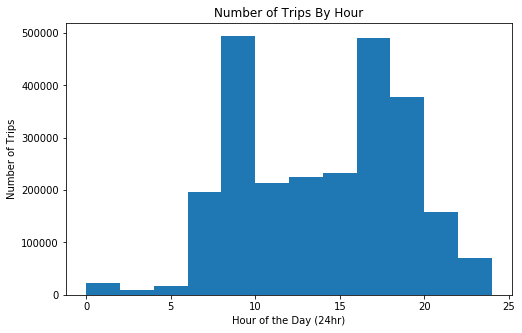

In [32]:
# Plot trip counts based on time of day (hour)
plt.figure(figsize=[8,5])
binsize = 2
bin_edges = np.arange(0, 25, binsize)
plt.hist(data=rides, x = 'hour', bins=bin_edges)
plt.xlabel('Hour of the Day (24hr)')
plt.ylabel('Number of Trips')
plt.title('Number of Trips By Hour 2019')
plt.show()

> The distribution of hour of the day appears roughly bimodal, with the most trips occuring around 8am and around 5pm (17hr) which coincides with the start and end of a workday.

> Next I will examine rides on each day of the week.

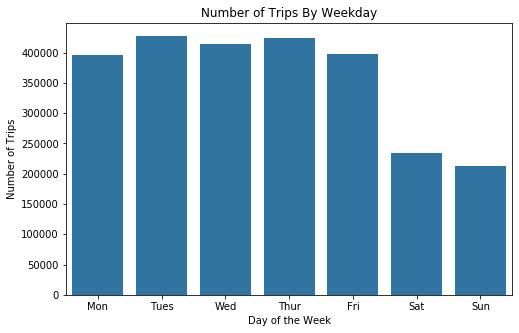

In [3]:
# Plot trip counts based on day of the week (weekday)
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
sb.countplot(data=rides, x = 'weekday', color = base_color)
plt.xticks(days, day_names)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips By Weekday')
plt.show()

>The count plot shows that most bike trips occur during the work week with significantly less on the weekend.  Tuesdays and Thursdays show slightly higher numbers than the other work days.  Next I will examine trips by month to see if the time of year makes a difference in the bike usage.

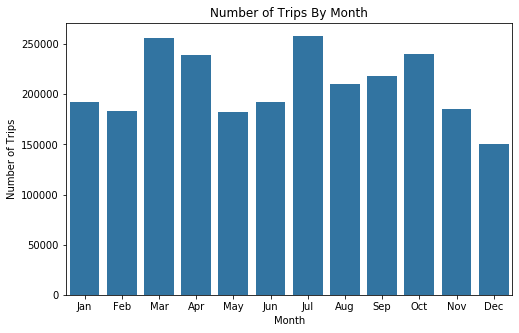

In [5]:
# Plot trip counts based on month of the year
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
sb.countplot(data=rides, x = 'month', color = base_color)
plt.xticks(months, month_names)
plt.ylabel('Number of Trips')
plt.title('Number of Trips By Month')
plt.xlabel('Month')

plt.show()

>The count plot by month shows the most trips occuring in March, April, July, and October. Perhaps these months have the nicest weather in the San Francisco area.  Below I will plot the count of the rides by user type.

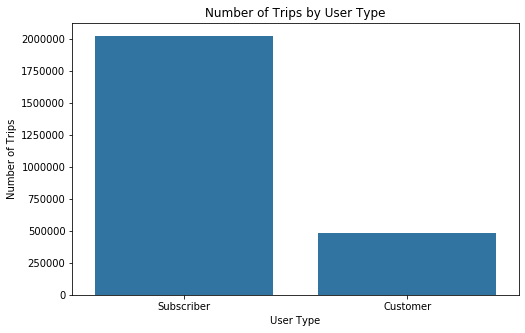

In [8]:
# Plot trip counts based on user type
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
sb.countplot(data=rides, x = 'user_type', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by User Type')
plt.show()

> The count plot shows that subscribers, in other words people who have become members, greatly outnumber the customers, who are just casual users.  Lastly in this section, I will examine the distribution of the duration of the rides.

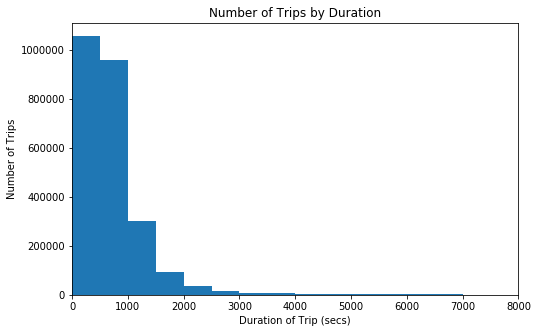

In [4]:
# Plot trip counts based on duration of ride
plt.figure(figsize=[8,5])
binsize = 500
bin_edges = np.arange(0,rides.duration_sec.max()+binsize , binsize)
plt.hist(data=rides, x = 'duration_sec',bins = bin_edges)
plt.xlim(0,8000)
plt.xlabel('Duration of Trip (secs)')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Duration')
plt.show()

In [21]:
# Convert duration from seconds to minutes for easier interpretation
rides['duration_mins'] = rides['duration_sec']/60

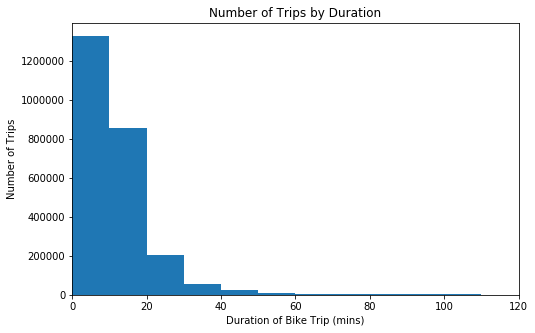

In [5]:
# Plot trip counts based on duration of ride in terms of minutes
plt.figure(figsize=[8,5])
binsize = 10
bin_edges = np.arange(0, rides.duration_mins.max()+binsize, binsize)
plt.hist(data=rides, x = 'duration_mins',bins = bin_edges)
plt.xlim(0,120)
plt.xlabel('Duration of Bike Trip (mins)')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Duration')
plt.show()

> I converted the duration from seconds to minutes and added the data as a new column, duration_mins, to the dataframe for easier interpretation.  The distribution shows the higher concentration of trips were less than 30 minutes but with a long tail into the higher numbers.  I will investigate the rides that were less than 30 minutes by limiting the durations plotted.  

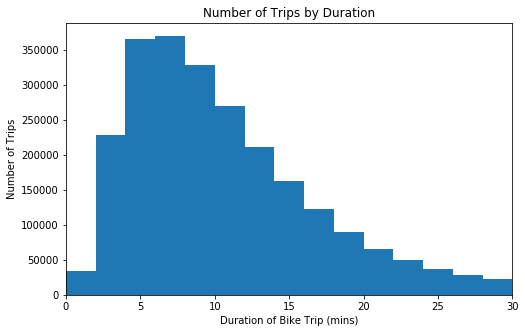

In [6]:
# Since the highest numbers are on low end, check out durations less than 30 minutes
plt.figure(figsize=[8,5])
binsize = 2
bin_edges = np.arange(0, rides.duration_mins.max()+binsize, binsize)
plt.hist(data=rides, x = 'duration_mins',bins = bin_edges)
plt.xlim(0,30)
plt.xlabel('Duration of Bike Trip (mins)')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Duration')
plt.show()

> The distribution of duration peaks between 5 minutes and 10 minutes.  I will also use a log transform of duration to take a closer at durations at the higher end.

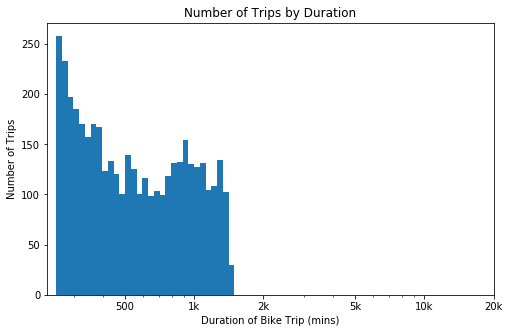

In [7]:
# Since the distribution also has a long tail, try a log scale for the durations overall
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(rides['duration_mins'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = rides, x = 'duration_mins', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration of Bike Trip (mins)')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Duration')
plt.show()

> The log transformed plot of duration shows at least one outlier between 10000 and 20000.  I will check to see how many outliers.

In [43]:
# check to see how many outliers
high_outliers = (rides['duration_mins']>1500)
print(high_outliers.sum())
print(rides.loc[high_outliers,:])

1
         duration_sec           start_time             end_time  \
2481276        912110  2019-12-19 23:15:36  2019-12-30 12:37:26   

         start_station_id start_station_name  start_station_latitude  \
2481276               NaN                NaN               37.323757   

         start_station_longitude  end_station_id end_station_name  \
2481276              -121.878614             NaN              NaN   

         end_station_latitude  end_station_longitude  bike_id user_type  hour  \
2481276             37.327656            -121.868598   614329  Customer    23   

         weekday  month  duration_mins  
2481276        3     12   15201.833333  


In [44]:
# Drop the one outlier since it seems an anomaly
rides.drop(2481276, inplace=True)
high_outliers = (rides['duration_mins']>1500)
print(high_outliers.sum())

0


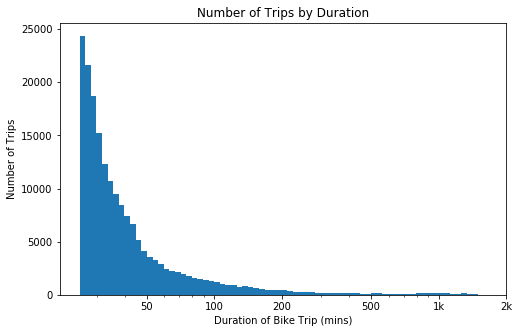

In [8]:
# Try plot without outlier
log_binsize = 0.025
bins = 10 ** np.arange(1.4, np.log10(rides['duration_mins'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = rides, x = 'duration_mins', bins = bins)
plt.xscale('log')
plt.xticks([50, 100, 200, 500, 1e3, 2e3], [50, 100, 200, 500, '1k', '2k'])
plt.xlabel('Duration of Bike Trip (mins)')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Duration')
plt.show()

In [48]:
# recheck average and mean duration
rides['duration_mins'].describe()

count    2.506982e+06
mean     1.345475e+01
std      3.148294e+01
min      1.000000e+00
25%      5.983333e+00
50%      9.516667e+00
75%      1.478333e+01
max      1.437167e+03
Name: duration_mins, dtype: float64

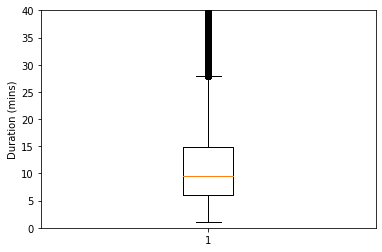

In [9]:
# Plot boxplot to show average duration
plt.boxplot(data = rides, x = 'duration_mins')
plt.ylim(0,40)
plt.ylabel('Duration (mins)');

>I found only one outlier with a duration greater than 1500 minutes.  It was 15201 minutes, or 253 hours, long.  I removed it from the data since it seems to be an anomaly - either someone forgot to return their bike or it's an error.  The new plot of duration distribution shows a right skewed distribution with greater bike rentals on the lower end.  The average duration is 13 minutes.

In [49]:
# Saved altered ride data for all of 2019 into csv
rides.to_csv('rides.csv', index = False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable had a large concentration of values at the lower end but many values that stretch into the higher end.  I needed to perform a log transformation to see the values at the higher end better. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I converted the duration from seconds to minutes and added the data as an additional column because it is easier to interpret data in minutes.  Also there was one outlier that I removed from the dataset.

## Bivariate Exploration

>In this section, I will mainly examine the effect of the user type on the number of trips taken in terms of hour, day of the week, or month of the year. I will also examine average duration verus time of day and user type.

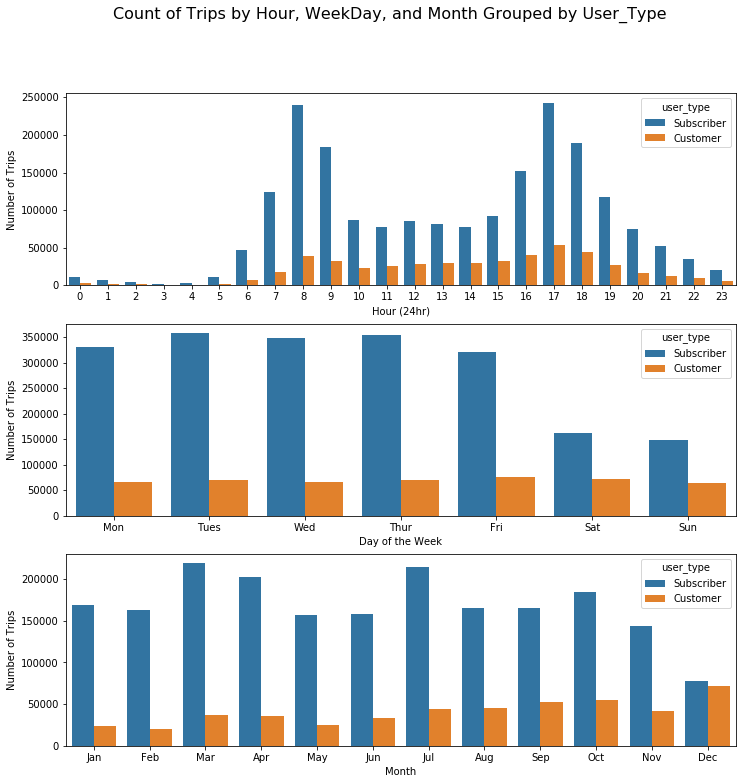

In [11]:
# Plot three plots of user type versus hour, weekday, and month
fig = plt.figure(figsize=[12,12])
fig.suptitle('Count of Trips by Hour, WeekDay, and Month Grouped by User_Type', fontsize=16)

# Subplot 1: hour vs user type
plt.subplot(3,1,1)
sb.countplot(data = rides, x = 'hour', hue = 'user_type')
plt.ylabel('Number of Trips')
plt.xlabel('Hour (24hr)')

# Subplot 2: weekday vs user type
ax = plt.subplot(3,1,2)
sb.countplot(data = rides, x = 'weekday', hue = 'user_type')
plt.xticks(days, day_names)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')

# Subplot 3: month vs user type
ax = plt.subplot(3,1,3)
sb.countplot(data = rides, x = 'month', hue = 'user_type')
plt.xticks(months, month_names)
plt.ylabel('Number of Trips')
plt.xlabel('Month')

plt.show()

> The plot of number of trips by hour shows the same pattern of peaking at 8am and 5pm for both subscribers and customers.  The plot by day of the week shows that subscribers use the bikes more during the work week and less on the weekend.  The customers' usage is fairly consistently the same across the days.  The plot by month shows the subscriber's usage peaks in March, Arpil, July, and October.  The customer's usage shows a slow increase from July to peaking in December with a slight dip in November.
Next I will investigate if user type makes a difference in average duration.

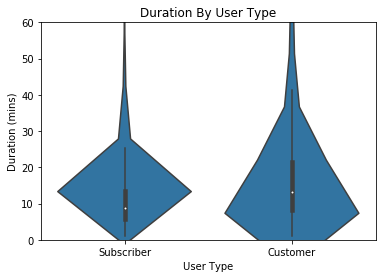

In [5]:
# Plot violinplots to see if user type makes a difference in average duration
base_color = sb.color_palette()[0]
plt.ylim(0,60)
sb.violinplot(data = rides, x = 'user_type', y = 'duration_mins', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.title('Duration By User Type');

> The average duration seems slightly higher for customers than for subscribers.  Next I will see if the hour of the day makes a difference.

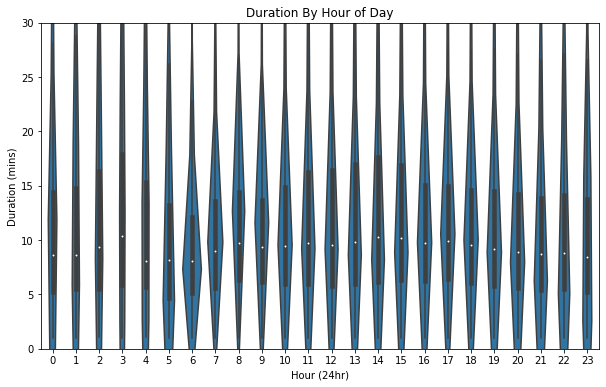

In [7]:
# Plot violinplot to see if hour of day makes a difference in duration
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
plt.ylim(0,30)
sb.violinplot(data = rides, x = 'hour', y = 'duration_mins', color = base_color)
plt.xlabel('Hour (24hr)')
plt.ylabel('Duration (mins)')
plt.title('Duration By Hour of Day');

> The median duration is slightly less beteen 4am and 7am but otherwise is fairly consistent.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The feature of interest, the number of trips taken, did vary with the time of day for both user types, peaking at the beginning of the work day around 8am and at the end of the work day around 5pm.  Subscribers took more trips during the work week, Monday thru Friday, than on the weekend, Saturday and Sunday.  The number of trips for customers did not vary according to the day of the week.  The usage by month did vary for both customers and subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customers seem to have a slightly longer average duration for trips but the time of day does not seem to make a great difference, except for being slightly lower early in the morning.

## Multivariate Exploration

> In this section, I will examine the effect on average duration of hour of day, day of the week, and month of year grouped by user type.

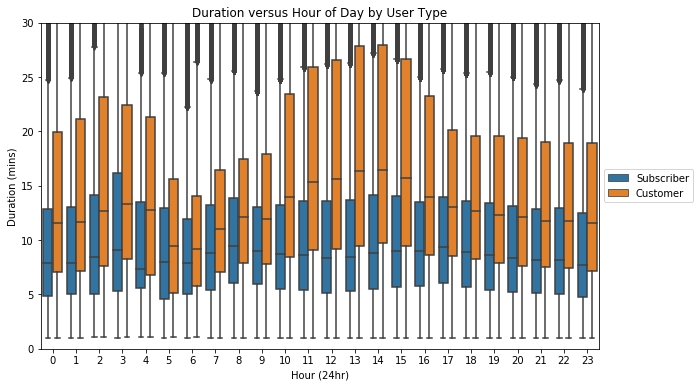

In [13]:
#Plot Duration verus hour of day by user type
plt.figure(figsize=[10,6])
plt.ylim(0,30)
sb.boxplot(data = rides, x = 'hour', y = 'duration_mins', hue='user_type')
plt.xlabel('Hour (24hr)')
plt.ylabel('Duration (mins)')
plt.title('Duration versus Hour of Day by User Type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

> When looking by time of day, customers have higher average duration than subscribers. peaking around the middle of the day from 10am to 4pm. 

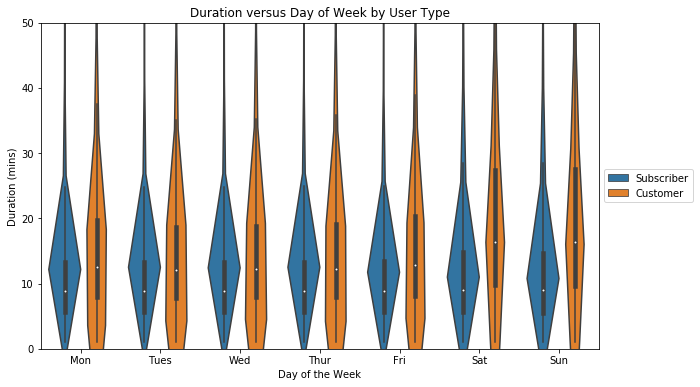

In [14]:
#Plot Duration verus day of the week by user type
plt.figure(figsize=[10,6])
plt.ylim(0,50)
sb.violinplot(data = rides, x = 'weekday', y = 'duration_mins', hue='user_type')
plt.title('Duration versus Day of Week by User Type')
plt.xticks(days, day_names)
plt.xlabel('Day of the Week')
plt.ylabel('Duration (mins)')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

> When looking by day of the week, customers have a slightly higher average duration subscribers, peaking on the weekend.  
The average duration for subscribers does not vary by day of the week.

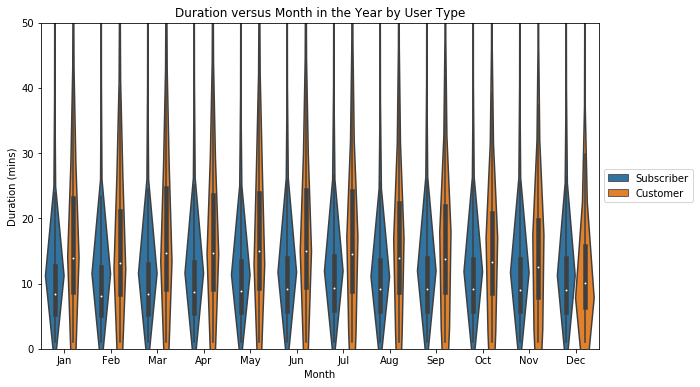

In [15]:
#Plot Duration verus month by user type
plt.figure(figsize=[10,6])
plt.ylim(0,50)
sb.violinplot(data = rides, x = 'month', y = 'duration_mins', hue='user_type')
plt.title('Duration versus Month in the Year by User Type')
plt.xticks(months, month_names)
plt.ylabel('Duration (mins)')
plt.xlabel('Month')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

>When looking by month, the customers still have a higher average duration than subscribers, being highest in the months between March and July.  The average duration for subscribers does not seem to vary by month.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The number of trips for subscribers was the most during the work week and at the beginning of the work day at 8am and the end of the work day at 5pm, indicating they used the bikes to get to work and back.  The average duration of usage for casual customers was greater in every time frame than for subscribers.

### Were there any interesting or surprising interactions between features?

> Surprisingly, the most trips for casual customers occurred in month of December, perhaps they used them for Christmas shopping and visiting friends more.  Also interestingly, the most trips for subscribers occurred in month of March.